<a href="https://colab.research.google.com/github/Washington055/Projects/blob/main/Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/a10.csv",parse_dates=["date"])

In [3]:
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [4]:
df.isnull().sum()

date     0
value    0
dtype: int64

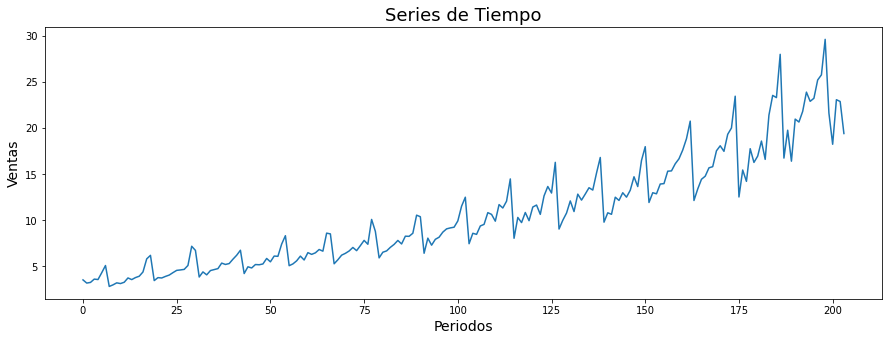

In [5]:
plt.figure(figsize=(15,5))
plt.plot(df.index,df["value"])
plt.xlabel("Periodos",fontsize=14)
plt.ylabel("Ventas",fontsize=14)
plt.title("Series de Tiempo", fontsize=18)
plt.show()

In [11]:
df["year"] = df['date'].dt.year
df["year_month"] = df["date"].apply(lambda x : pd.Timestamp(x).strftime("%Y-%m"))

In [12]:
df

,date,value,year,month,year_month
0,1991-07-01,3.526591,1991,1991-07,1991-07
1,1991-08-01,3.180891,1991,1991-08,1991-08
2,1991-09-01,3.252221,1991,1991-09,1991-09
3,1991-10-01,3.611003,1991,1991-10,1991-10
4,1991-11-01,3.565869,1991,1991-11,1991-11
...,...,...,...,...,...
199,2008-02-01,21.654285,2008,2008-02,2008-02
200,2008-03-01,18.264945,2008,2008-03,2008-03
201,2008-04-01,23.107677,2008,2008-04,2008-04
202,2008-05-01,22.912510,2008,2008-05,2008-05


In [16]:
anual = df.groupby(by=["year"]).sum().reset_index()
anual

,year,value
0,1991,21.442946
1,1992,45.686946
2,1993,55.532688
3,1994,60.816080
4,1995,67.326599
5,1996,77.397927
6,1997,85.131672
7,1998,93.310626
8,1999,105.959043
9,2000,122.496586


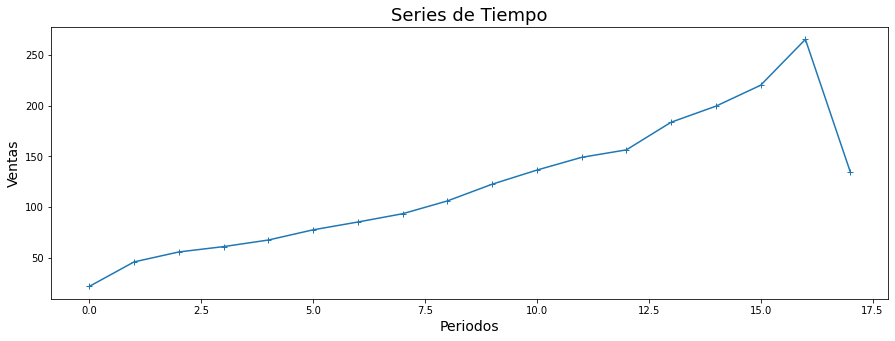

In [20]:
plt.figure(figsize=(15,5))
plt.plot(anual.index,anual["value"],"-+")
plt.xlabel("Periodos",fontsize=14)
plt.ylabel("Ventas",fontsize=14)
plt.title("Series de Tiempo", fontsize=18)
plt.show()

In [22]:
#Promedio Movil

anual["MA"]=anual["value"].rolling(window=3).mean().shift(1)
anual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


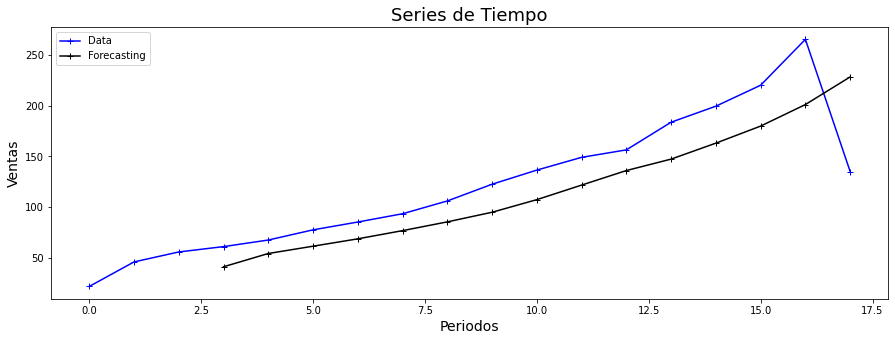

In [24]:
plt.figure(figsize=(15,5))
plt.plot(anual.index,anual["value"],"-+", color="blue", label="Data")
plt.plot(anual.index,anual["MA"],"-+", color="black",label="Forecasting")
plt.xlabel("Periodos",fontsize=14)
plt.ylabel("Ventas",fontsize=14)
plt.legend(loc="best")
plt.title("Series de Tiempo", fontsize=18)
plt.show()

In [25]:
anual.loc[len(anual)]=[int(anual.iloc[len(anual)-1][0])+1,0,0]
anual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


In [27]:

anual["MA"]=anual["value"].rolling(window=3).mean().shift(1)

anual["year"]=anual["year"].astype(int)
anual["value"]=anual["value"].astype(float)
anual["MA"]=anual["MA"].astype(float)

anual

,year,value,MA
0,1991,21.442946,NaN
1,1992,45.686946,NaN
2,1993,55.532688,NaN
3,1994,60.816080,40.887527
4,1995,67.326599,54.011905
5,1996,77.397927,61.225122
6,1997,85.131672,68.513535
7,1998,93.310626,76.618732
8,1999,105.959043,85.280075
9,2000,122.496586,94.800447


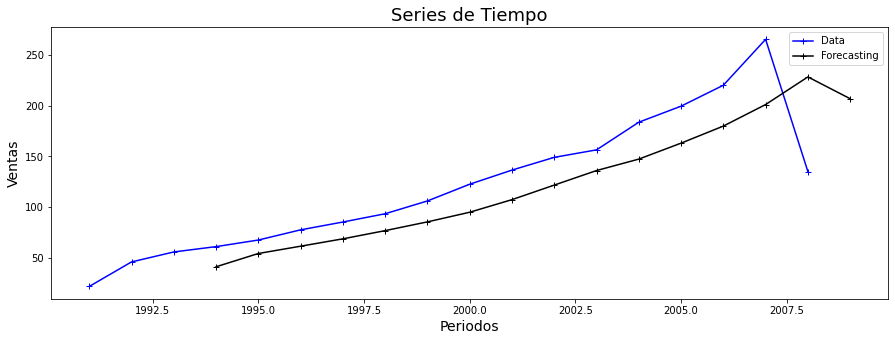

In [29]:
plt.figure(figsize=(15,5))
plt.plot(anual["year"][:-1],anual["value"][:-1],"-+", color="blue", label="Data")
plt.plot(anual["year"],anual["MA"],"-+", color="black",label="Forecasting")
plt.xlabel("Periodos",fontsize=14)
plt.ylabel("Ventas",fontsize=14)
plt.legend(loc="best")
plt.title("Series de Tiempo", fontsize=18)
plt.show()